# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [229]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [230]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [231]:
#city_data = { }
# data we need for dataframe in the next steps based on api order
lats = []
longs = []
temp_maxes = []
humidities = []
dates = []
wind_speeds = []
cloudiness = []
countries = []
city_data = []
temp_units = "imperial"
#i = 0
# keep a track of count
city_count_curr = 0
set_count = 1
for city in cities:
    target_url = ("http://api.openweathermap.org/data/2.5/weather?q={0}&appid={1}&units={2}").format(city, weather_api_key, 
                                                                                                     temp_units)
    #city_data[i] = requests.get(target_url).json() 
    #print("Processing City: "+str(i)+"| City Name: "+city)
    #i +=1
    try:
        response = requests.get(target_url).json() 
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        temp_maxes.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        dates.append(response['dt'])
        wind_speeds.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        if city_count_curr > 48:
            city_count_curr = 1
            set_count += 1
            city_data.append(city)
        else:
            city_count_curr += 1
            city_data.append(city)
        print(f"Processing Record {city_count_curr} of Set {set_count} | {city}")
    except Exception:
        print(f"City not found. Skipping...")
print("------------------------------\n")
print("Data Retrieval Complete\n")
print("------------------------------\n")

Processing Record 1 of Set 1 | egvekinot
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | bairiki
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | nanortalik
Processing Record 7 of Set 1 | oskarshamn
Processing Record 8 of Set 1 | albany
City not found. Skipping...
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | kastamonu
Processing Record 13 of Set 1 | emerald
City not found. Skipping...
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | isabela
Processing Record 16 of Set 1 | grand gaube
Processing Record 17 of Set 1 | vao
Processing Record 18 of Set 1 | vilyuysk
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | flinders
City not found. Skipping...
Processing Record 21 of Set 1 | sigayevo
Processing Record 22 of Set 1 | severo-kurilsk
Processing

Processing Record 40 of Set 4 | kalmunai
Processing Record 41 of Set 4 | imeni poliny osipenko
Processing Record 42 of Set 4 | asau
Processing Record 43 of Set 4 | la ronge
Processing Record 44 of Set 4 | meulaboh
Processing Record 45 of Set 4 | alofi
Processing Record 46 of Set 4 | hailey
Processing Record 47 of Set 4 | ulladulla
Processing Record 48 of Set 4 | ketou
Processing Record 49 of Set 4 | ixtapa
Processing Record 1 of Set 5 | tautira
Processing Record 2 of Set 5 | half moon bay
Processing Record 3 of Set 5 | dunedin
Processing Record 4 of Set 5 | bilokurakyne
Processing Record 5 of Set 5 | tete
Processing Record 6 of Set 5 | svolvaer
Processing Record 7 of Set 5 | chara
Processing Record 8 of Set 5 | latung
Processing Record 9 of Set 5 | jinka
Processing Record 10 of Set 5 | basoko
Processing Record 11 of Set 5 | san quintin
Processing Record 12 of Set 5 | xunchang
Processing Record 13 of Set 5 | rio gallegos
Processing Record 14 of Set 5 | kaeo
Processing Record 15 of Set 5

Processing Record 37 of Set 8 | coquimbo
Processing Record 38 of Set 8 | geraldton
Processing Record 39 of Set 8 | aykhal
Processing Record 40 of Set 8 | sorrento
City not found. Skipping...
Processing Record 41 of Set 8 | spirit river
Processing Record 42 of Set 8 | kenora
Processing Record 43 of Set 8 | koster
Processing Record 44 of Set 8 | port moresby
Processing Record 45 of Set 8 | valparaiso
Processing Record 46 of Set 8 | pedasi
Processing Record 47 of Set 8 | kudahuvadhoo
Processing Record 48 of Set 8 | kajaani
Processing Record 49 of Set 8 | aripuana
Processing Record 1 of Set 9 | pochutla
Processing Record 2 of Set 9 | shahrud
Processing Record 3 of Set 9 | hambantota
Processing Record 4 of Set 9 | tupaciguara
Processing Record 5 of Set 9 | san francisco
Processing Record 6 of Set 9 | polczyn-zdroj
Processing Record 7 of Set 9 | tasiilaq
Processing Record 8 of Set 9 | cidreira
Processing Record 9 of Set 9 | touros
Processing Record 10 of Set 9 | baltasi
Processing Record 11 

Processing Record 31 of Set 12 | ayan
City not found. Skipping...
Processing Record 32 of Set 12 | fort walton beach
Processing Record 33 of Set 12 | miri
Processing Record 34 of Set 12 | coari
Processing Record 35 of Set 12 | henties bay
Processing Record 36 of Set 12 | santo antonio do monte
Processing Record 37 of Set 12 | varkaus
Processing Record 38 of Set 12 | niamey
Processing Record 39 of Set 12 | lagoa
------------------------------

Data Retrieval Complete

------------------------------



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [232]:
# Create a dict of the lists
weather_dict = {
    "City":city_data,
    "Lat":lats,
    "Lng":longs,
    "Max Temp":temp_maxes,
    "Humidity":humidities,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates
}

# Build and display dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df = weather_df.dropna()
weather_df.head()

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0  egvekinot  66.32 -179.17     18.91        94          58        9.19   
1      kapaa  22.08 -159.32     69.80        88          40        6.93   
2    bairiki   1.33  172.98     80.60        78          20        6.93   
3  esperance -33.87  121.90     66.20        68           0       17.22   
4  jamestown  42.10  -79.24     42.01       100          90        5.82   

  Country        Date  
0      RU  1603793622  
1      US  1603793574  
2      KI  1603793622  
3      AU  1603793622  
4      US  1603793622

In [233]:
# Export data to csv
weather_df.to_csv(output_data_file)

# statistical information for weather_df
weather_df.describe()

Lat         Lng    Max Temp   Humidity  Cloudiness  Wind Speed  \
count  578.000000  578.000000  578.000000  578.00000  578.000000  578.000000   
mean    20.380813   19.490830   60.525606   71.33218   52.217993    7.755830   
std     32.866068   88.675705   22.824888   23.43538   39.228490    5.161706   
min    -54.800000 -179.170000   -4.000000    1.00000    0.000000    0.200000   
25%     -6.197500  -58.372500   46.000000   63.00000    9.000000    3.580000   
50%     24.695000   22.860000   64.200000   78.00000   56.000000    6.930000   
75%     48.490000   97.570000   79.387500   88.00000   90.000000   10.740000   
max     78.220000  179.320000  106.990000  100.00000  100.000000   31.340000   

               Date  
count  5.780000e+02  
mean   1.603794e+09  
std    6.231966e+01  
min    1.603793e+09  
25%    1.603794e+09  
50%    1.603794e+09  
75%    1.603794e+09  
max    1.603794e+09

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [234]:
weather_df_humid_mod = weather_df.query('Humidity < 100')
weather_df_humid_mod.describe()

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  555.000000  555.000000  555.000000  555.000000  555.000000  555.000000   
mean    20.265297   22.255820   60.776829   70.144144   51.293694    7.846432   
std     32.891161   88.386603   23.111543   23.162137   39.337316    5.204880   
min    -54.800000 -179.170000   -4.000000    1.000000    0.000000    0.200000   
25%     -6.175000  -53.565000   46.200000   62.000000    8.000000    3.800000   
50%     24.340000   25.000000   64.540000   77.000000   52.000000    6.930000   
75%     48.830000   98.650000   79.960000   87.000000   90.000000   10.930000   
max     78.220000  179.320000  106.990000   99.000000  100.000000   31.340000   

               Date  
count  5.550000e+02  
mean   1.603794e+09  
std    6.259044e+01  
min    1.603793e+09  
25%    1.603794e+09  
50%    1.603794e+09  
75%    1.603794e+09  
max    1.603794e+09

In [170]:
#  Get the indices of cities that have humidity over 100%.
# Just did a query to remove all the humidity less than 100

In [171]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [235]:
weather_df_humid_mod.head()


City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0   egvekinot  66.32 -179.17     18.91        94          58        9.19   
1       kapaa  22.08 -159.32     69.80        88          40        6.93   
2     bairiki   1.33  172.98     80.60        78          20        6.93   
3   esperance -33.87  121.90     66.20        68           0       17.22   
5  nanortalik  60.14  -45.24     30.24        91           1       15.86   

  Country        Date  
0      RU  1603793622  
1      US  1603793574  
2      KI  1603793622  
3      AU  1603793622  
5      GL  1603793623

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

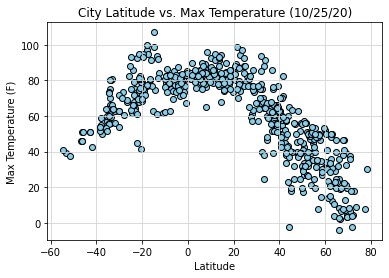

In [236]:
# Lat vs Max Temp
plt.scatter(weather_df_humid_mod["Lat"], weather_df_humid_mod["Max Temp"], edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("../output_data/Fig1.png")


## Latitude vs. Humidity Plot

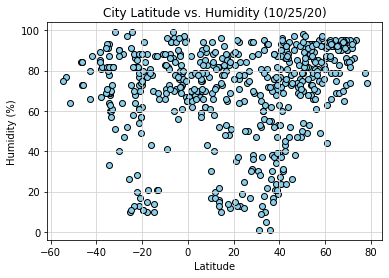

In [237]:
# Lat vs Humidity
plt.scatter(weather_df_humid_mod["Lat"], weather_df_humid_mod["Humidity"], edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("../output_data/Fig2.png")


## Latitude vs. Cloudiness Plot

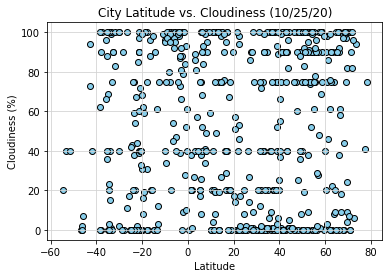

In [238]:
# Lat vs Cloudiness
plt.scatter(weather_df_humid_mod["Lat"], weather_df_humid_mod["Cloudiness"], edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (10/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("../output_data/Fig3.png")


## Latitude vs. Wind Speed Plot

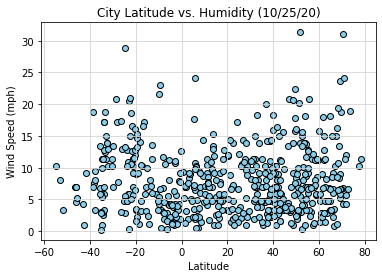

In [239]:
# Lat vs Wind Speed
plt.scatter(weather_df_humid_mod["Lat"], weather_df_humid_mod["Wind Speed"], edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("../output_data/Fig4.png")

## Linear Regression

In [240]:
# We need northern hemisphere and souther hemisphere
north_hemis_df = weather_df_humid_mod.loc[pd.to_numeric(weather_df_humid_mod["Lat"]).astype(float) > 0, :]
south_hemis_df = weather_df_humid_mod.loc[pd.to_numeric(weather_df_humid_mod["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression line eq is: y = -1.07x + 97.2
The r value is: -0.8713300984052367
The regression plot has a nature of decreasing as well as its r value is negative so its a negative correlation.
So that means in the northern hemisphere as you move away from the equator the temperature will decrease.


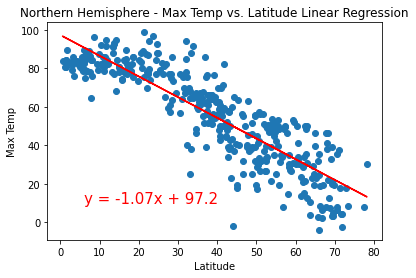

<Figure size 432x288 with 0 Axes>

In [249]:
# North hemisphere plot
x_val = pd.to_numeric(north_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemis_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
print("The regression plot has a nature of decreasing as well as its r value is negative so its a negative correlation.")
print("So that means in the northern hemisphere as you move away from the equator the temperature will decrease.")
plt.show()
plt.savefig("../output_data/Fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression line eq is: y = 0.67x + 85.8
The r value is: 0.6638875677024291
The regression plot has a nature of increasing as well as its r value is posiitve so its a positive correlation.
So that means in the northern hemisphere as you get close to the equator the temperature will increase.


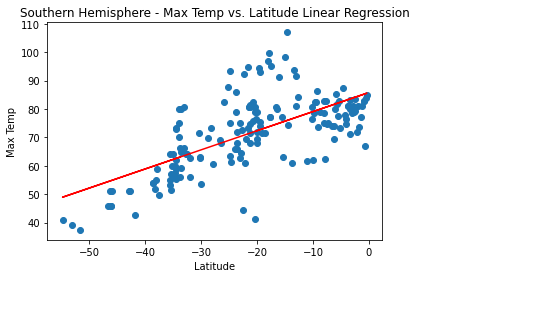

<Figure size 432x288 with 0 Axes>

In [250]:
# Now for the south hemisphere
x_val = pd.to_numeric(south_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemis_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
print("The regression plot has a nature of increasing as well as its r value is posiitve so its a positive correlation.")
print("So that means in the northern hemisphere as you get close to the equator the temperature will increase.")
plt.show()
plt.savefig("../output_data/Fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression line eq is: y = 0.37x + 56.08
The r value is: 0.31077282736012796
The regression plot does show a little bit of an increase but not enough to make a solid conclusion.
So that means there isn't much of a correlation in this data set but if there is its a positive correlation.


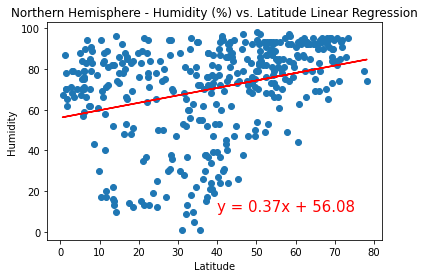

<Figure size 432x288 with 0 Axes>

In [251]:
# Now for the North hemisphere humidity
x_val = pd.to_numeric(north_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemis_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
print("The regression plot does show a little bit of an increase but not enough to make a solid conclusion.")
print("So that means there isn't much of a correlation in this data set but if there is its a positive correlation.")
plt.show()
plt.savefig("../output_data/Fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression line eq is: y = 0.05x + 71.29
The r value is: 0.03070787874036278
The regression plot does show a little bit of an increase but not enough to make a solid conclusion.
So that means there isn't much of a correlation in this data set but if there is its a positive correlation.


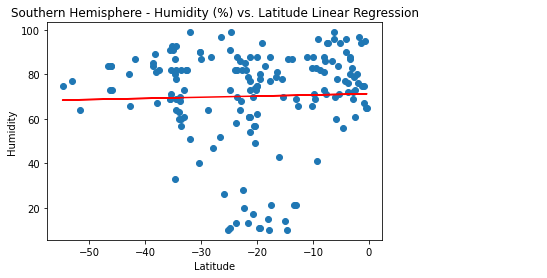

<Figure size 432x288 with 0 Axes>

In [252]:
# Now for the South hemisphere humidity
x_val = pd.to_numeric(south_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemis_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
print("The regression plot does show a little bit of an increase but not enough to make a solid conclusion.")
print("So that means there isn't much of a correlation in this data set but if there is its a positive correlation.")
plt.show()
plt.savefig("../output_data/Fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression line eq is: y = 0.27x + 39.78
The r value is: 0.1365775518079801
The regression plot does show a little bit of an increase but not enough to make a solid conclusion.
So that means there isn't much of a correlation in this data set but if there is its a positive correlation.


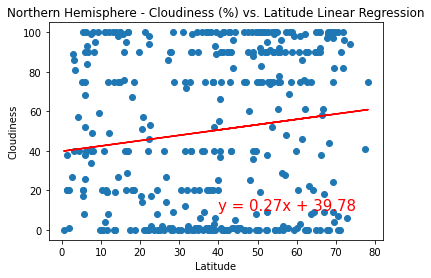

<Figure size 432x288 with 0 Axes>

In [253]:
# Now for the North hemisphere humidity
x_val = pd.to_numeric(north_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemis_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
print("The regression plot does show a little bit of an increase but not enough to make a solid conclusion.")
print("So that means there isn't much of a correlation in this data set but if there is its a positive correlation.")
plt.show()
plt.savefig("../output_data/Fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression line eq is: y = 0.8x + 70.65
The r value is: 0.2735762453619019
The regression plot does show a little bit of an increase but not enough to make a solid conclusion.
So that means there isn't much of a correlation in this data set but if there is its a positive correlation.


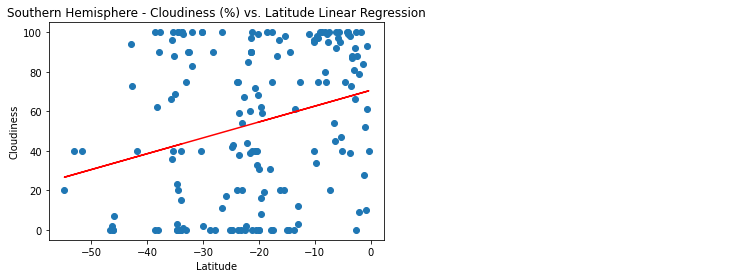

<Figure size 432x288 with 0 Axes>

In [254]:
# Now for the South hemisphere humidity
x_val = pd.to_numeric(south_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemis_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
print("The regression plot does show a little bit of an increase but not enough to make a solid conclusion.")
print("So that means there isn't much of a correlation in this data set but if there is its a positive correlation.")
plt.show()
plt.savefig("../output_data/Fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression line eq is: y = 0.04x + 6.11
The r value is: 0.16397497292073854
The regression plot does show a little bit of an increase but not enough to make a solid conclusion.
So that means there isn't much of a correlation in this data set but if there is its a positive correlation.


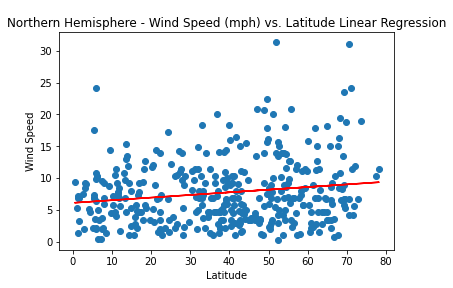

<Figure size 432x288 with 0 Axes>

In [255]:
# Now for the North hemisphere humidity
x_val = pd.to_numeric(north_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemis_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (6,35), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
print("The regression plot does show a little bit of an increase but not enough to make a solid conclusion.")
print("So that means there isn't much of a correlation in this data set but if there is its a positive correlation.")
plt.show()
plt.savefig("../output_data/Fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression line eq is: y = -0.09x + 6.34
The r value is: -0.21046530677709258
The regression plot does show a little bit of an increase but not enough to make a solid conclusion.
So that means there isn't much of a correlation in this data set but if there is its a negative correlation.


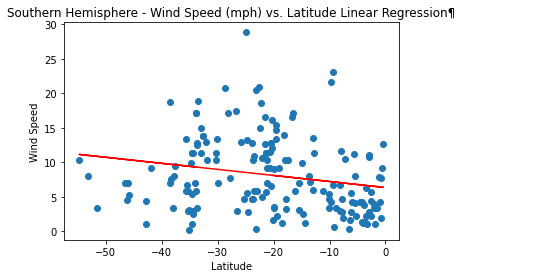

<Figure size 432x288 with 0 Axes>

In [256]:
# Now for the North hemisphere humidity
x_val = pd.to_numeric(south_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemis_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (6,25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear RegressionÂ¶")
print(f"The r value is: {rvalue}")
print("The regression plot does show a little bit of an increase but not enough to make a solid conclusion.")
print("So that means there isn't much of a correlation in this data set but if there is its a negative correlation.")
plt.show()
plt.savefig("../output_data/Fig12.png")